Import the necessary packages

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import and check out the data 

In [12]:
oil_dataset = pd.read_csv('cleaned_datasets/date_oil_fuel_tax.csv')

In [16]:
print(oil_dataset.head())

         Date  Barrel_oil_£  Diesel(pence/litre)  Petrol(pence/litre)  \
0  2022-06-27     89.049618               198.93               190.93   
1  2022-06-20     87.742586               194.87               186.85   
2  2022-06-13     89.609124               190.43               182.53   
3  2022-06-06     97.959906               184.94               174.99   
4  2022-05-30     95.155435               182.25               170.36   

   Dutyrate   vat  
0     52.95  20.0  
1     52.95  20.0  
2     52.95  20.0  
3     52.95  20.0  
4     52.95  20.0  


In [17]:
print(oil_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 989 non-null    object 
 1   Barrel_oil_£         989 non-null    float64
 2   Diesel(pence/litre)  989 non-null    float64
 3   Petrol(pence/litre)  989 non-null    float64
 4   Dutyrate             989 non-null    float64
 5   vat                  989 non-null    float64
dtypes: float64(5), object(1)
memory usage: 46.5+ KB
None


First we need to convert the Date column to date format

In [24]:
oil_dataset['Date'] = pd.to_datetime(oil_dataset['Date'], dayfirst=False)


,Date,Barrel_oil_£,Diesel(pence/litre),Petrol(pence/litre),Dutyrate,vat
0,2022-06-27,89.049618,198.93,190.93,52.95,20.0
1,2022-06-20,87.742586,194.87,186.85,52.95,20.0
2,2022-06-13,89.609124,190.43,182.53,52.95,20.0
3,2022-06-06,97.959906,184.94,174.99,52.95,20.0
4,2022-05-30,95.155435,182.25,170.36,52.95,20.0


Now we'll need to put the dataset in ascending order

In [27]:
oil_dataset.sort_values(by='Date', ascending=True, inplace=True)
oil_dataset

,Date,Barrel_oil_£,Diesel(pence/litre),Petrol(pence/litre),Dutyrate,vat
988,2003-06-09,18.319505,76.77,74.59,45.82,17.5
987,2003-06-16,18.519738,76.69,74.47,45.82,17.5
986,2003-06-23,17.746401,76.62,74.42,45.82,17.5
985,2003-06-30,18.242874,76.51,74.35,45.82,17.5
984,2003-07-07,19.180896,76.46,74.28,45.82,17.5
...,...,...,...,...,...,...
4,2022-05-30,95.155435,182.25,170.36,52.95,20.0
3,2022-06-06,97.959906,184.94,174.99,52.95,20.0
2,2022-06-13,89.609124,190.43,182.53,52.95,20.0
1,2022-06-20,87.742586,194.87,186.85,52.95,20.0


Now let's draw a linegraph to show how the price changes

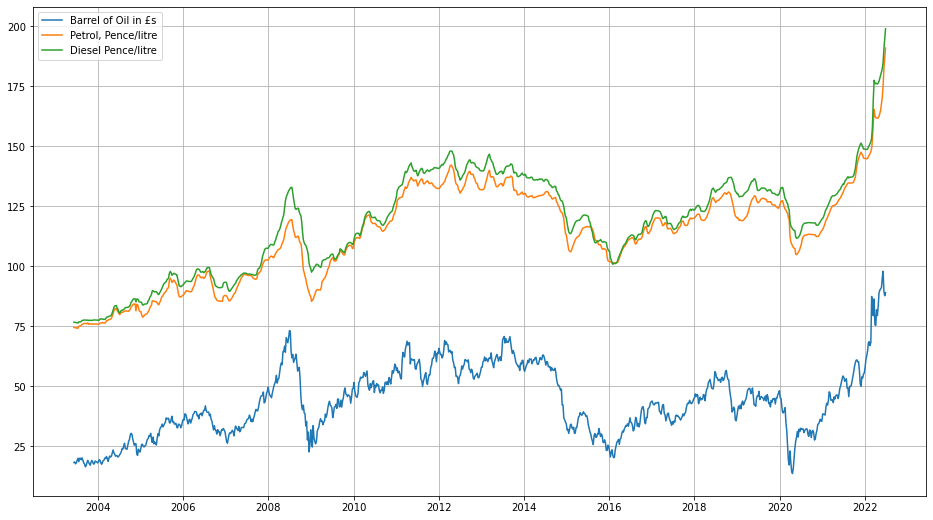

In [44]:
plt.figure(figsize=(16,9))
plt.plot(oil_dataset['Date'], oil_dataset['Barrel_oil_£'], label='Barrel of Oil in £s')
plt.plot(oil_dataset['Date'], oil_dataset['Petrol(pence/litre)'], label='Petrol, Pence/litre')
plt.plot(oil_dataset['Date'], oil_dataset['Diesel(pence/litre)'], label='Diesel Pence/litre')
plt.legend()
plt.grid()
plt.show()

Graph inaccurate, need to convert cost of oil into pence/litre,
42 gallons in a barrel, 4.54609 litres in a gallon, 

In [36]:
def barrel_to_pence_litre(df):
    new_price = (df * 42 * 4.54609)/ 100
    return new_price
oil_dataset['oil pence/litre'] = barrel_to_pence_litre(oil_dataset['Barrel_oil_£'])

In [38]:
oil_dataset

,Date,Barrel_oil_£,Diesel(pence/litre),Petrol(pence/litre),Dutyrate,vat,oil pence/litre
988,2003-06-09,18.319505,76.77,74.59,45.82,17.5,34.978490
987,2003-06-16,18.519738,76.69,74.47,45.82,17.5,35.360806
986,2003-06-23,17.746401,76.62,74.42,45.82,17.5,33.884229
985,2003-06-30,18.242874,76.51,74.35,45.82,17.5,34.832174
984,2003-07-07,19.180896,76.46,74.28,45.82,17.5,36.623193
...,...,...,...,...,...,...,...
4,2022-05-30,95.155435,182.25,170.36,52.95,20.0,181.685772
3,2022-06-06,97.959906,184.94,174.99,52.95,20.0,187.040511
2,2022-06-13,89.609124,190.43,182.53,52.95,20.0,171.095880
1,2022-06-20,87.742586,194.87,186.85,52.95,20.0,167.531991


Now lets look at the prices where they are all measured in pence per litre

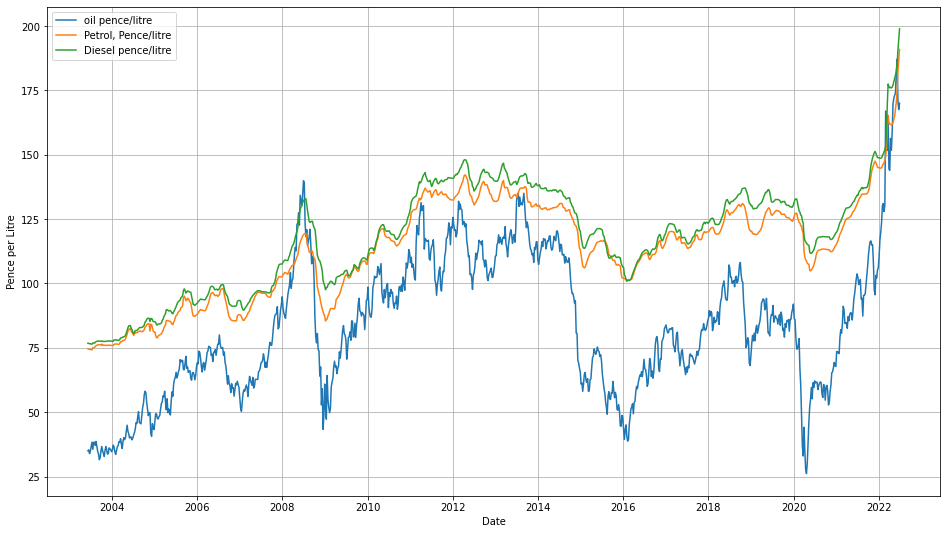

In [49]:

plt.figure(figsize=(16,9))
plt.plot(oil_dataset['Date'], oil_dataset['oil pence/litre'], label='oil pence/litre')
plt.plot(oil_dataset['Date'], oil_dataset['Petrol(pence/litre)'], label='Petrol, Pence/litre')
plt.plot(oil_dataset['Date'], oil_dataset['Diesel(pence/litre)'], label='Diesel pence/litre')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Pence per Litre')
plt.grid()
plt.show()

This gives us a clearer picture as all units are now the same, going from the graph you would have to say that the price of oil does directly affect the price of petrol and diesel

# Variance of prices

In [54]:
print(oil_dataset[['Barrel_oil_£', 'Petrol(pence/litre)', 'Diesel(pence/litre)', 'oil pence/litre']].var())

Barrel_oil_£           210.779600
Petrol(pence/litre)    391.553999
Diesel(pence/litre)    441.089733
oil pence/litre        768.428059
dtype: float64


# Correlation matrix

In [56]:
oil_dataset[['Petrol(pence/litre)', 'Diesel(pence/litre)', 'oil pence/litre']].corr()

,Petrol(pence/litre),Diesel(pence/litre),oil pence/litre
Petrol(pence/litre),1.000000,0.991004,0.841351
Diesel(pence/litre),0.991004,1.000000,0.856549
oil pence/litre,0.841351,0.856549,1.000000


As expected from seeing the first graph, the correlation matrix ifs full of numbers very close to 1, the only thing i did notice is that petrol and diesel are more closely correlated with each other than with the price of oil.